# SME0878 - Mineração Estatística de Dados
## Trabalho 2
- Alef Segura Santos, 9762942
- Gustavo de Moura Souza, 9762981

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

import pandas as pd
import numpy as np

from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## Classificadores

## Questão 1

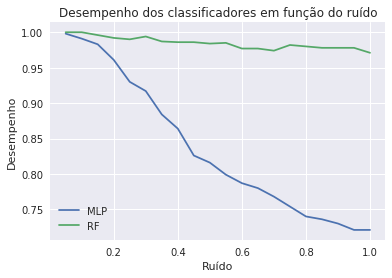

In [2]:
rfc = RandomForestClassifier()
mlp = MLPClassifier(hidden_layer_sizes=(20), max_iter=2000)

P = np.linspace(0.05,1,20)
scores = []

for p in P:
    dataset = make_moons(n_samples=1000, noise=p, random_state=0)
    X = dataset[0]
    y = dataset[1]

    mlp.fit(X,y)
    score_mlp = mlp.score(X,y)
    
    rfc.fit(X,y)
    score_rfc = rfc.score(X,y)
    
    scores.append({'Noise':p,'MLP':score_mlp,'RF':score_rfc})

scores_df = pd.DataFrame(scores).set_index('Noise')

plt.title('Desempenho dos classificadores em função do ruído')
plt.plot(scores_df)
plt.xlabel('Ruído')
plt.ylabel('Desempenho')
plt.legend(['MLP','RF'])
plt.show()

## Questão 2

In [5]:
vehicles = pd.read_csv('Vehicle.csv')

X = vehicles.iloc[:,:-1].values
y = LabelEncoder().fit_transform(vehicles.iloc[:,-1:])

/home/alefsegura/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


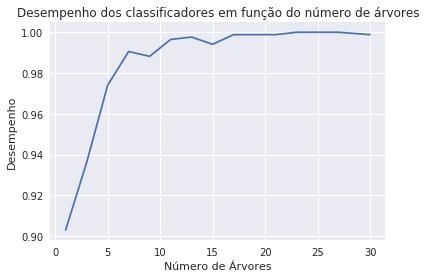

In [4]:
N = np.linspace(1,30,15,dtype=int)
scores = []

for n in N:    
    rfc = RandomForestClassifier(n_estimators=n).fit(X,y)    
    scores.append({'Trees':n,'Score':rfc.score(X,y)})

scores_df = pd.DataFrame(scores).set_index('Trees')

plt.plot(scores_df)
plt.title('Desempenho do RF em função do número de árvores')
plt.xlabel('Número de Árvores')
plt.ylabel('Desempenho')
plt.show()

## Questão 3

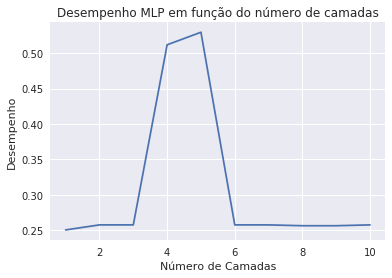

In [18]:
layers = [tuple(j for j in range(1,i+1)) for i in range(1,11)]
scores = []

for l in layers:    
    mlp = MLPClassifier(hidden_layer_sizes=l, max_iter=2000).fit(X,y)
    scores.append({'Layers':len(l),'Score':mlp.score(X,y)})

scores_df = pd.DataFrame(scores).set_index('Layers')

plt.plot(scores_df)
plt.title('Desempenho MLP em função do número de camadas')
plt.xlabel('Número de Camadas')
plt.ylabel('Desempenho')
plt.show()

## Questão 4

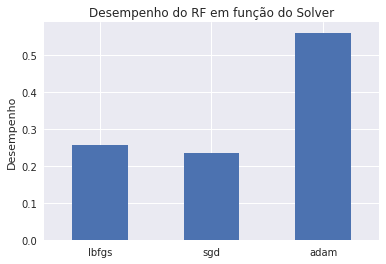

In [19]:
scores = []
for s in ['lbfgs', 'sgd', 'adam']:
    mlp = MLPClassifier(hidden_layer_sizes=(10), solver=s, max_iter=1000).fit(X,y)
    scores.append({'Solver':s,'Score':mlp.score(X,y)})

scores_df = pd.DataFrame(scores).set_index('Solver')

scores_df.plot(kind='bar', rot=0, legend=False, title='Desempenho do RF em função do Solver')
plt.ylabel('Desempenho')
plt.xlabel('')
plt.show()

## Questão 5

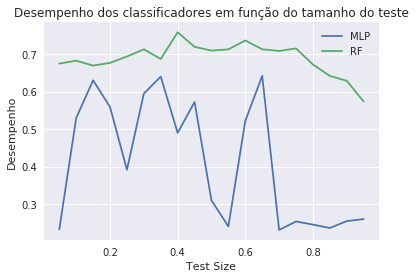

In [7]:
rfc = RandomForestClassifier()
mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter=2000)

scores = []

for p in np.linspace(0.05, 0.95, 19):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=p,random_state=0)
    
    mlp.fit(X_train,y_train)
    score_mlp = mlp.score(X_test,y_test)
    
    rfc.fit(X_train,y_train)
    score_rfc = rfc.score(X_test,y_test)
    
    scores.append({'Test Size':p,'MLP':score_mlp,'RF':score_rfc})

scores_df = pd.DataFrame(scores).set_index('Test Size')

plt.title('Desempenho dos classificadores em função do tamanho do teste')
plt.plot(scores_df)
plt.xlabel('Test Size')
plt.ylabel('Desempenho')
plt.legend(['MLP','RF'])
plt.show()